<a href="https://colab.research.google.com/github/yeshivadataanalytics/predict-alzheimers/blob/zeyu/2_Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# depending library
from os import listdir
from os.path import isfile, join
import numpy as np
import png
import pydicom
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# 1. Convert DCM image to PNG

### 1.1 Read all dcm files

In [ ]:
dcm_file = [f for f in listdir('dataprocess/DCM') if isfile(join('dataprocess/DCM', f))]
dcm_file

['168_S_6634 9.dcm',
 '168_S_6634 8.dcm',
 '168_S_6634 10.dcm',
 '168_S_6634 11.dcm',
 '168_S_6634.dcm',
 '168_S_6634 3.dcm',
 '168_S_6634 2.dcm',
 '168_S_6634 6.dcm',
 '168_S_6634 7.dcm',
 '168_S_6634 5.dcm',
 '168_S_6634 4.dcm']

### 1.2 transfer dcm to png and save to dataprocess/PNG

In [ ]:
for dcmfile in dcm_file:
    ds = pydicom.dcmread('dataprocess/DCM/'+dcmfile)
    shape = ds.pixel_array.shape
    image_2d = ds.pixel_array.astype(float)
    image_2d_scaled = (np.maximum(image_2d, 0)/image_2d.max())*255.0
    image_2d_scaled = np.uint8(image_2d_scaled)
    with open('dataprocess/PNG/'+dcmfile.split('.')[0]+'.png', 'wb') as png_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(png_file, image_2d_scaled)

### 1.3 show example

In [ ]:
png_files = [f for f in listdir('dataprocess/PNG') if isfile(join('dataprocess/PNG', f))]
png_files

['168_S_6634 8.png',
 '168_S_6634 9.png',
 '168_S_6634 2.png',
 '168_S_6634 3.png',
 '168_S_6634 4.png',
 '168_S_6634 5.png',
 '168_S_6634 7.png',
 '168_S_6634 6.png',
 '168_S_6634 11.png',
 '168_S_6634 10.png',
 '168_S_6634.png']

In [ ]:
random_png_file = random.sample(png_files, 9)

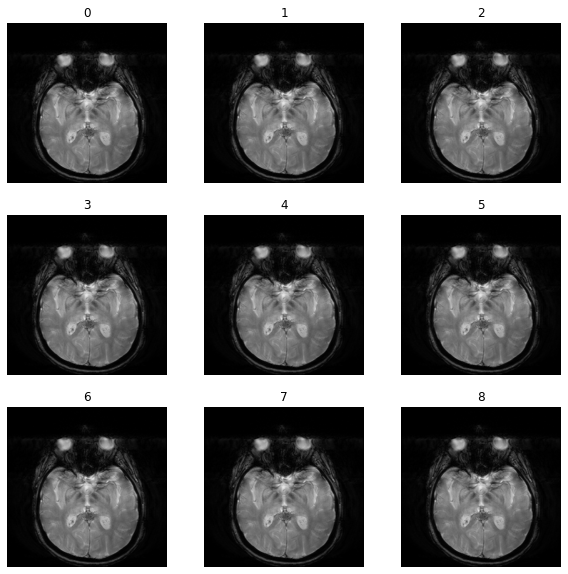

In [ ]:
plt.figure(figsize=(10, 10))
for images in random_png_file:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        imag = Image.open('./dataprocess/PNG/'+images)
        plt.imshow(imag, cmap='gray')
        plt.title(i)
        plt.axis("off")

In [ ]:
imag11 = Image.open('./dataprocess/PNG/168_S_6634 3.png')

In [ ]:
import dicom2nifti

In [ ]:
dicom2nifti.convert_directory('/Users/zeyu/yu/capstone/data2/dataprocess/DCM/168_S_6634 9.dcm', '/Users/zeyu/yu/capstone/data2/Dcm2nii/168_S_6634 9.nii.gz', compression=True, reorient=True)

In [ ]:
dicom2nifti.dicom_series_to_nifti(original_dicom_directory, output_file, reorient_nifti=True)

In [ ]:
import os
dirpath = os.listdir('/Users/zeyu/yu/capstone/data2/dataprocess/DCM/')
for imag in dirpath:
    dicom2nifti.convert_directory(os.path.join('/Users/zeyu/yu/capstone/data2/dataprocess/DCM/',imag), os.path.join('/Users/zeyu/yu/capstone/data2/Dcm2nii/',str(imag)+'.nii'))

In [ ]:
import dicom2nifti
#import dicom2nifti.settings as settings

# settings.disable_validate_orthogonal()
# settings.enable_resampling()
# settings.set_resample_spline_interpolation_order(1)
# settings.set_resample_padding(-1000)

dicom2nifti.convert_directory('/Users/zeyu/yu/capstone/data2/dataprocess/DCM/168_S_6634 2.dcm', '/Users/zeyu/yu/capstone/data2/Dcm2nii/bbb.nii')

In [ ]:
from nipype.interfaces.fsl import BET

In [ ]:
skullstrip = BET()
skullstrip.inputs.in_file = "/Users/zeyu/yu/capstone/data2/ADNI/036_S_6887/Accelerated_Sagittal_MPRAGE/2021-10-19_11_09_08.0/S1075031/ADNI_036_S_6887_MR_Accelerated_Sagittal_MPRAGE__br_raw_20211021152810523_206_S1075031_I1507378.nii"
skullstrip.inputs.out_file = "/Users/zeyu/yu/capstone/data2/Dcm2nii/aa.nii"
res = skullstrip.run()

In [ ]:
from nilearn.plotting import plot_anat

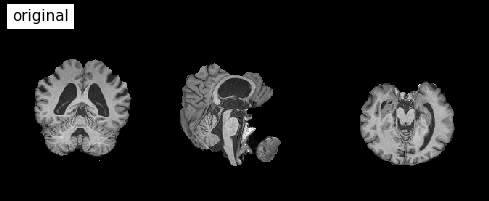

In [ ]:
    plot_anat('/Users/zeyu/yu/capstone/data2/Dcm2nii/aa.nii', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

In [ ]:
import gzip
import shutil
with gzip.open('/Users/zeyu/yu/capstone/data2/Dcm2nii/aa.nii.gz', 'rb') as f_in:
    with open('/Users/zeyu/yu/capstone/data2/Dcm2nii/aa.nii', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# 2. Data Processing

In [ ]:
############## simulation label
num = len(png_files)
label = [0]*int(num*0.4)+[1]*(num-int(num*0.4))
random.shuffle(label)
label

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1]

### 2.0 split into train and test

In [ ]:
## train = XXX
## test = XXX

### 2.1 resize image

In [ ]:
def is_grey_scale(img_path):
    img = Image.open(img_path).convert('RGB')
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            if r != g != b: 
                return False
    return True

In [ ]:
for i in range(len(png_files)):
    imag1 = Image.open('./dataprocess/PNG/'+png_files[i])
    if is_grey_scale('./dataprocess/PNG/'+png_files[i])==True:
        rgbimg = Image.new("RGBA", imag1.size)
        rgbimg.paste(imag1)
        imag1 = rgbimg
    imag1 = tf.keras.preprocessing.image.smart_resize(
        imag1, (200,200), interpolation='bilinear'
    )
    imag1 = tf.keras.utils.array_to_img(
        imag1, data_format=None, scale=True, dtype=None
    )
    if label[i]==1:
        imag1.save("dataprocess/train/AD/"+png_files[i], 'PNG')
    else:
        imag1.save("dataprocess/train/MCI/"+png_files[i], 'PNG')

2022-02-28 16:39:04.248892: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-28 16:39:04.249021: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [ ]:
for i in range(len(png_files)):
    imag1 = Image.open('./dataprocess/PNG/'+png_files[i])
    if is_grey_scale('./dataprocess/PNG/'+png_files[i])==True:
        rgbimg = Image.new("RGBA", imag1.size)
        rgbimg.paste(imag1)
        imag1 = rgbimg
    imag1 = tf.keras.preprocessing.image.smart_resize(
        imag1, (200,200), interpolation='bilinear'
    )
    imag1 = tf.keras.utils.array_to_img(
        imag1, data_format=None, scale=True, dtype=None
    )
    if label[i]==1:
        imag1.save("dataprocess/train/AD/"+png_files[i], 'PNG')
    else:
        imag1.save("dataprocess/train/MCI/"+png_files[i], 'PNG')

In [ ]:
for i in range(len(png_files)):
    imag1 = Image.open('./dataprocess/PNG/'+png_files[i])
    if is_grey_scale('./dataprocess/PNG/'+png_files[i])==True:
        rgbimg = Image.new("RGBA", imag1.size)
        rgbimg.paste(imag1)
        imag1 = rgbimg
    imag1 = tf.keras.preprocessing.image.smart_resize(
        imag1, (200,200), interpolation='bilinear'
    )
    imag1 = tf.keras.utils.array_to_img(
        imag1, data_format=None, scale=True, dtype=None
    )
    if label[i]==1:
        imag1.save("dataprocess/test/AD/"+png_files[i], 'PNG')
    else:
        imag1.save("dataprocess/test/MCI/"+png_files[i], 'PNG')

# 3 build model

### 3.1 design model by hand

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Read image files list

In [ ]:
train_AD = [f for f in listdir('dataprocess/train/AD/') if isfile(join('dataprocess/train/AD/', f))]
train_MCI = [f for f in listdir('dataprocess/train/MCI/') if isfile(join('dataprocess/train/MCI/', f))]
test_AD = [f for f in listdir('dataprocess/test/AD/') if isfile(join('dataprocess/test/AD/', f))]
test_MCI = [f for f in listdir('dataprocess/test/MCI/') if isfile(join('dataprocess/test/MCI/', f))]

In [ ]:
train_dataset_name = []
train_dataset_label = []
for i in range(len(train_AD)):
    train_dataset_name.append('dataprocess/train/AD/'+train_AD[i])
    train_dataset_label.append(1)
for i in range(len(train_MCI)):
    train_dataset_name.append('dataprocess/train/MCI/'+train_MCI[i])
    train_dataset_label.append(0)

In [ ]:
image_size = (100, 100)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataprocess/train/",
    image_size=image_size,
    batch_size=batch_size,
)

Found 17 files belonging to 2 classes.


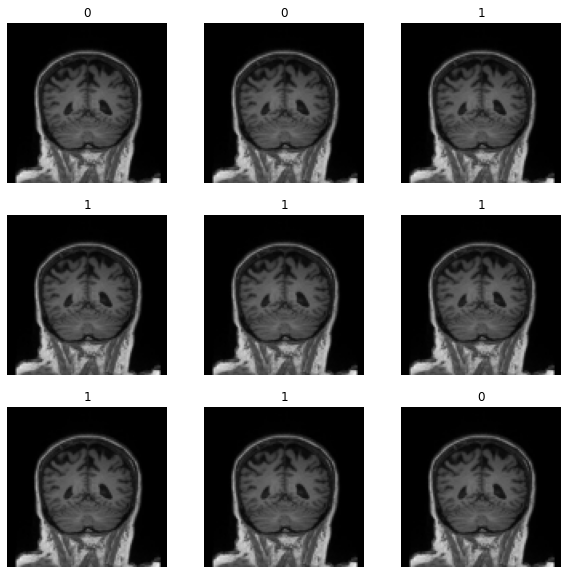

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

read data as tensor

In [ ]:
training_set = train_datagen.flow_from_directory("dataprocess/train/", target_size=(200, 200), batch_size=2, class_mode='binary')

Found 17 images belonging to 2 classes.


In [ ]:
test_set = train_datagen.flow_from_directory("dataprocess/test/", target_size=(200, 200), batch_size=2, class_mode='binary')

Found 17 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow import random
import numpy as np

In [ ]:
seed = 1
np.random.seed(seed)
random.set_seed(seed)
classifier = Sequential()

In [ ]:
classifier.add(Conv2D(256, 3, 3, input_shape = (200, 200, 3), activation = 'relu'))
classifier.add(Conv2D(256, 3, 3, activation = 'relu'))
classifier.add(MaxPool2D(2,2))
classifier.add(Conv2D(16, 3, 3, activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))
classifier.add(Flatten())
classifier.add(Dense(1024, activation='relu'))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit_generator(training_set, steps_per_epoch=30, epochs=30, validation_data=test_set, validation_steps=30, shuffle=False)

Epoch 1/30


2022-02-28 16:42:24.779871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 24ms/step - loss: 0.7539 - accuracy: 0.5294 - val_loss: 0.6915 - val_accuracy: 0.5294


2022-02-28 16:42:25.642444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


### 3.2 Build model by existing model

In [ ]:
from keras.applications.densenet import DenseNet201,preprocess_input
from keras.layers import Activation, Dense
base_model = DenseNet201(include_top=False, weights='imagenet',
    input_shape=(200,200,3), pooling=max, classes=2)

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(base_model.input, outputs=predictions)

In [ ]:
for layer in model.layers:
    layer.trainable=True

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(training_set, steps_per_epoch=30, epochs=30, validation_data=test_set, validation_steps=100)

Epoch 1/30


2022-02-28 16:39:37.003820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 9/30 [========>.....................] - ETA: 21s - loss: 2.9608 - accuracy: 0.5882WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 900 batches). You may need to use the repeat() function when building your dataset.


2022-02-28 16:39:56.167691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 26s 411ms/step - loss: 2.9608 - accuracy: 0.5882 - val_loss: 14.1773 - val_accuracy: 0.4706
